In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob, os

In [3]:
os.chdir(r'C:\Users\ebool\study\data')

# Get images path¶

In [5]:
IMG_NAME = ['boat','bridge','church',
            'mountain','newspaper','scottsdale']

img_boat = []
img_bridge = []
img_church = []
img_mountain = []
img_newspapert = []
img_scottsdale = []

img_var = [img_boat,img_bridge,img_church,
           img_mountain,img_newspapert,img_scottsdale]

for var, name in zip(img_var, IMG_NAME):
    for ext in ('0*.gif', '0*.png', '0*.jpg'):
        var.extend(glob.glob(os.path.join('image_stitching', name, ext)))

    var = sorted(var)
    print(var)

['image_stitching\\boat\\01.jpg', 'image_stitching\\boat\\02.jpg', 'image_stitching\\boat\\03.jpg', 'image_stitching\\boat\\04.jpg', 'image_stitching\\boat\\05.jpg', 'image_stitching\\boat\\06.jpg']
['image_stitching\\bridge\\01.jpg', 'image_stitching\\bridge\\02.jpg']
['image_stitching\\church\\01.png', 'image_stitching\\church\\02.png', 'image_stitching\\church\\03.png']
['image_stitching\\mountain\\01.png', 'image_stitching\\mountain\\02.png']
['image_stitching\\newspaper\\01.jpg', 'image_stitching\\newspaper\\02.jpg', 'image_stitching\\newspaper\\03.jpg', 'image_stitching\\newspaper\\04.jpg']
['image_stitching\\scottsdale\\01.jpg', 'image_stitching\\scottsdale\\02.jpg', 'image_stitching\\scottsdale\\03.jpg']


# Load images

In [6]:
cv2.__version__[0]

'4'

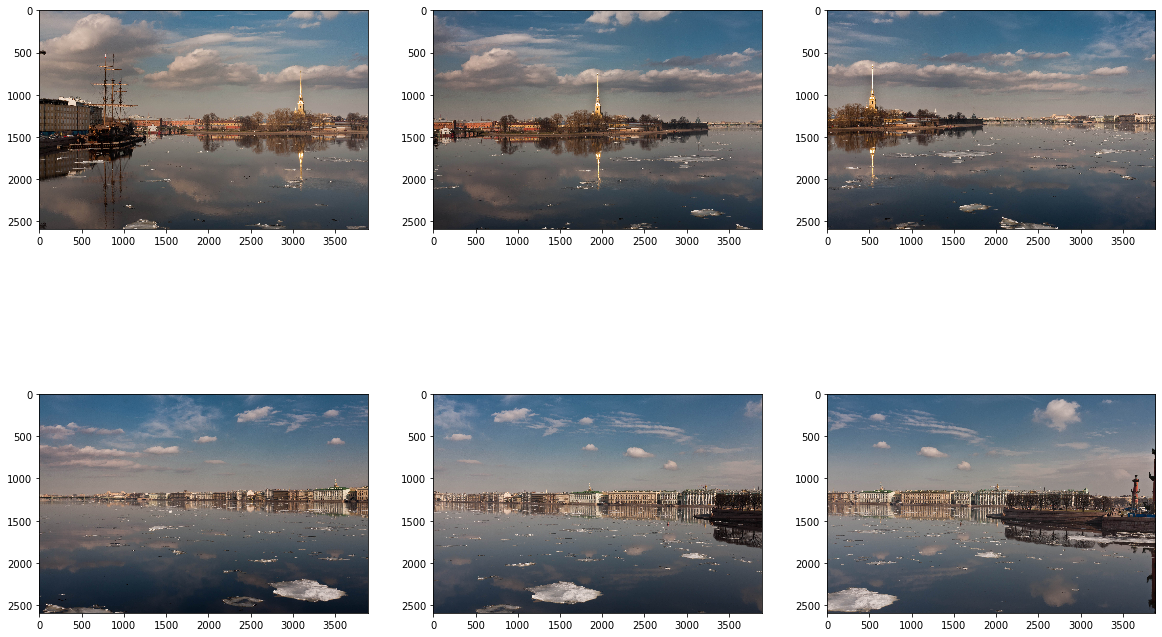

In [28]:
imgs = []

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_boat):
    img = cv2.imread(img_path)
    imgs.append(img)
    
    plt.subplot(len(img_list) // 3 + 1, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Stitch images

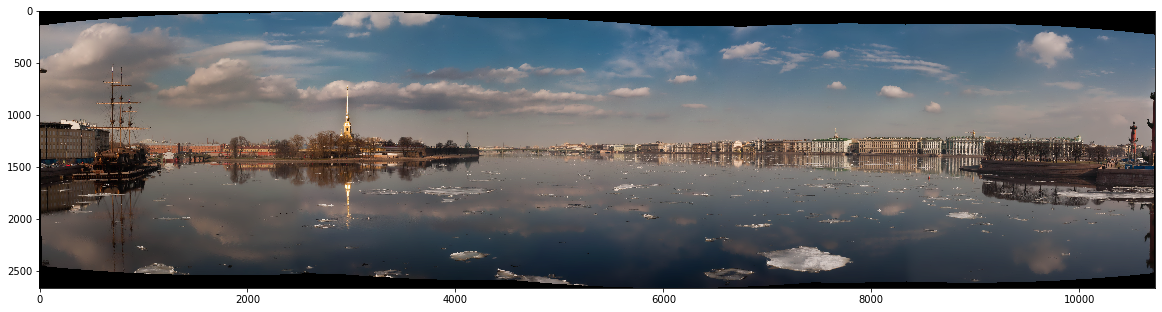

In [30]:
mode = cv2.STITCHER_PANORAMA
# mode = cv2.STITCHER_SCANS

if int(cv2.__version__[0]) == 3:
    stitcher = cv2.createStitcher(mode)
else:
    stitcher = cv2.Stitcher_create(mode)
    
status, stitched = stitcher.stitch(imgs)

if status == 0:
    cv2.imwrite(os.path.join('image_stitching', IMG_NAME[0], 'result.jpg'), stitched)

    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
else:
    print('failed... %s' % status)

# Get image mask
#### white 255
#### black 0

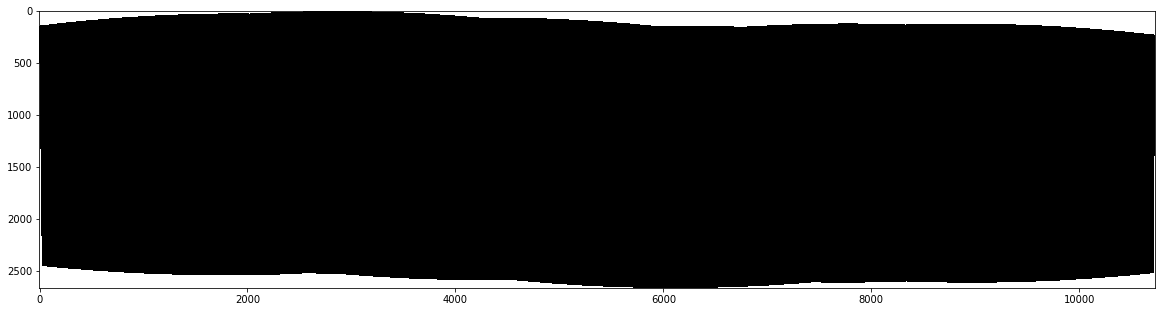

In [31]:
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
            # 반전 함수
thresh = cv2.bitwise_not(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1])
             # 이미지 노이즈 제거
thresh = cv2.medianBlur(thresh, 5)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')

# Remove margin (white space 255)

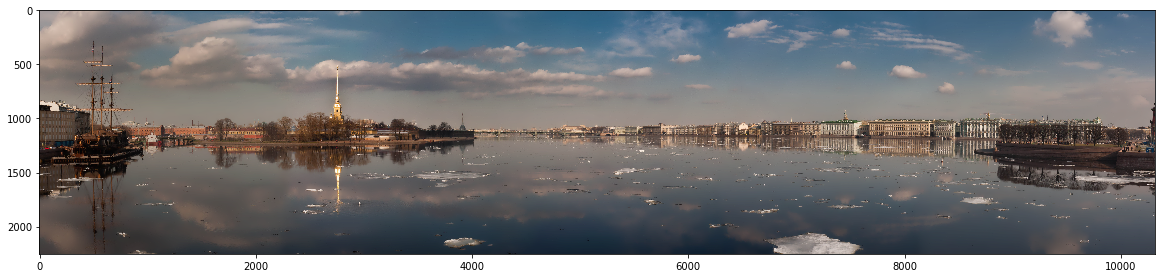

In [32]:
stitched_copy = stitched.copy()
thresh_copy = thresh.copy()

while np.sum(thresh_copy) > 0:
    # 인덱스 0을 제외하는 것부터가 화소 하나만큼 깎아 나가겠다는 의미임.
    thresh_copy = thresh_copy[1:-1, 1:-1] # 기준, 이거를 지워나가다 흰색이 없어지면 
                                          # 원본 사진에서도 검은 부분이 없어지므로
                                          # crop이 되게됨.
    stitched_copy = stitched_copy[1:-1, 1:-1]
    
cv2.imwrite(os.path.join('image_stitching', IMG_NAME[0], 'result_crop.jpg'), stitched_copy)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(stitched_copy, cv2.COLOR_BGR2RGB))

# Functionizing

In [33]:
def stitching(img_list,IMG_NAME):
    
    # Load images
    imgs = []
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path)
        imgs.append(img)
        
    # Stitch images
    mode = cv2.STITCHER_PANORAMA
    # mode = cv2.STITCHER_SCANS

    if int(cv2.__version__[0]) == 3:
        stitcher = cv2.createStitcher(mode)
    else:
        stitcher = cv2.Stitcher_create(mode)

    status, stitched = stitcher.stitch(imgs)

    if status == 0:
        cv2.imwrite(os.path.join('image_stitching', IMG_NAME, 'result.jpg'), stitched)
        
    else:
        print('failed... %s' % status)
    
    # Get image mask
    # white 255
    # black 0
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
            # 반전 함수
    thresh = cv2.bitwise_not(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1])
                 # 이미지 노이즈 제거
    thresh = cv2.medianBlur(thresh, 5)
    # Remove margin (white space 255)
    stitched_copy = stitched.copy()
    thresh_copy = thresh.copy()

    while np.sum(thresh_copy) > 0:
        # 인덱스 0을 제외하는 것부터가 화소 하나만큼 깎아 나가겠다는 의미임.
        thresh_copy = thresh_copy[1:-1, 1:-1] # 기준, 이거를 지워나가다 흰색이 없어지면 
                                              # 원본 사진에서도 검은 부분이 없어지므로
                                              # crop이 되게됨.
        stitched_copy = stitched_copy[1:-1, 1:-1]

    cv2.imwrite(os.path.join('image_stitching', IMG_NAME, 'result_crop.jpg'), stitched_copy)
    return stitched_copy

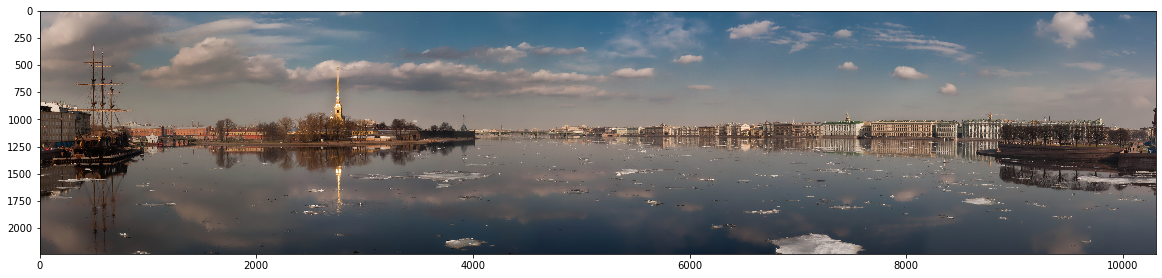

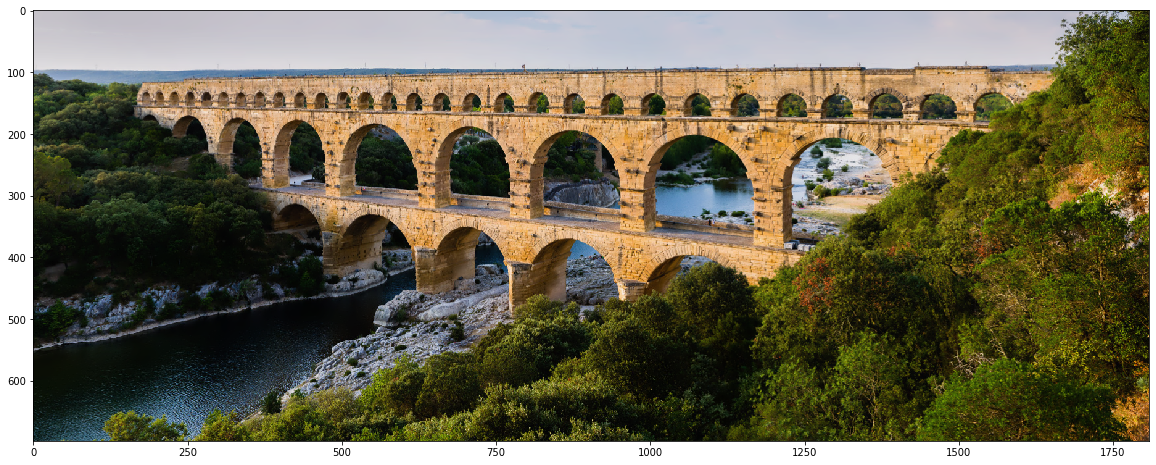

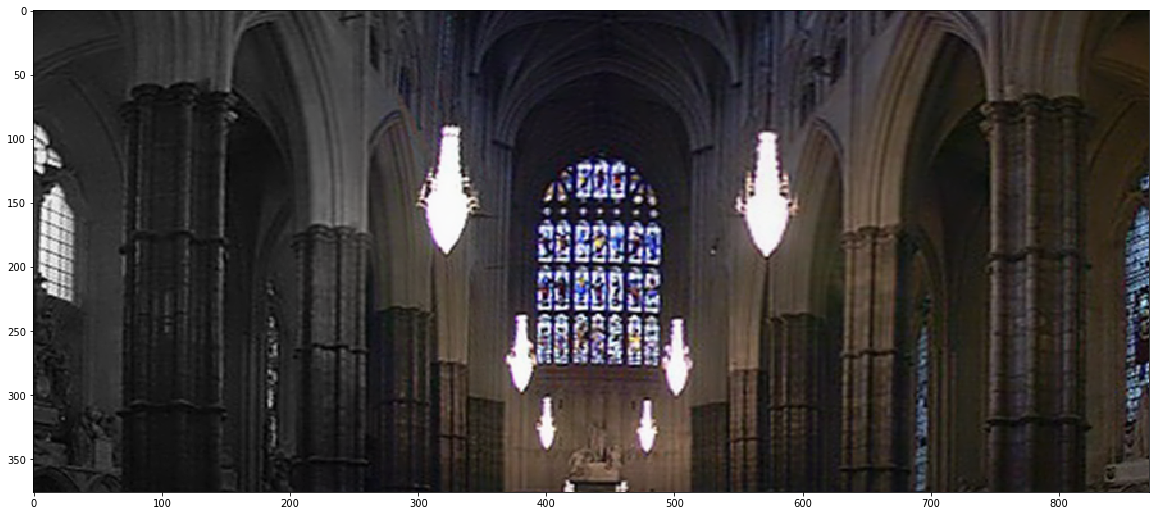

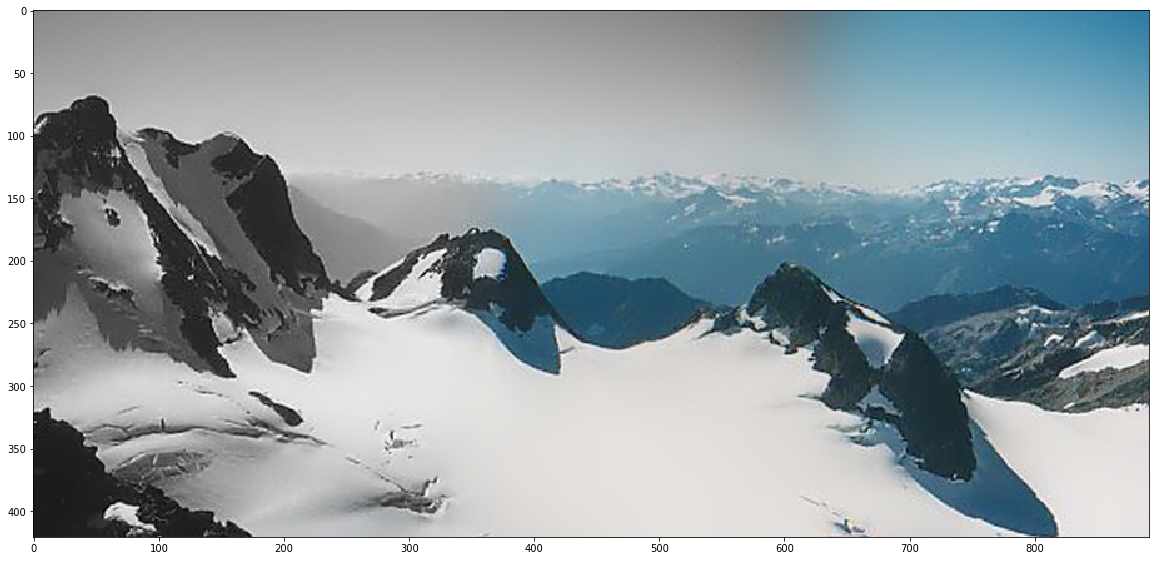

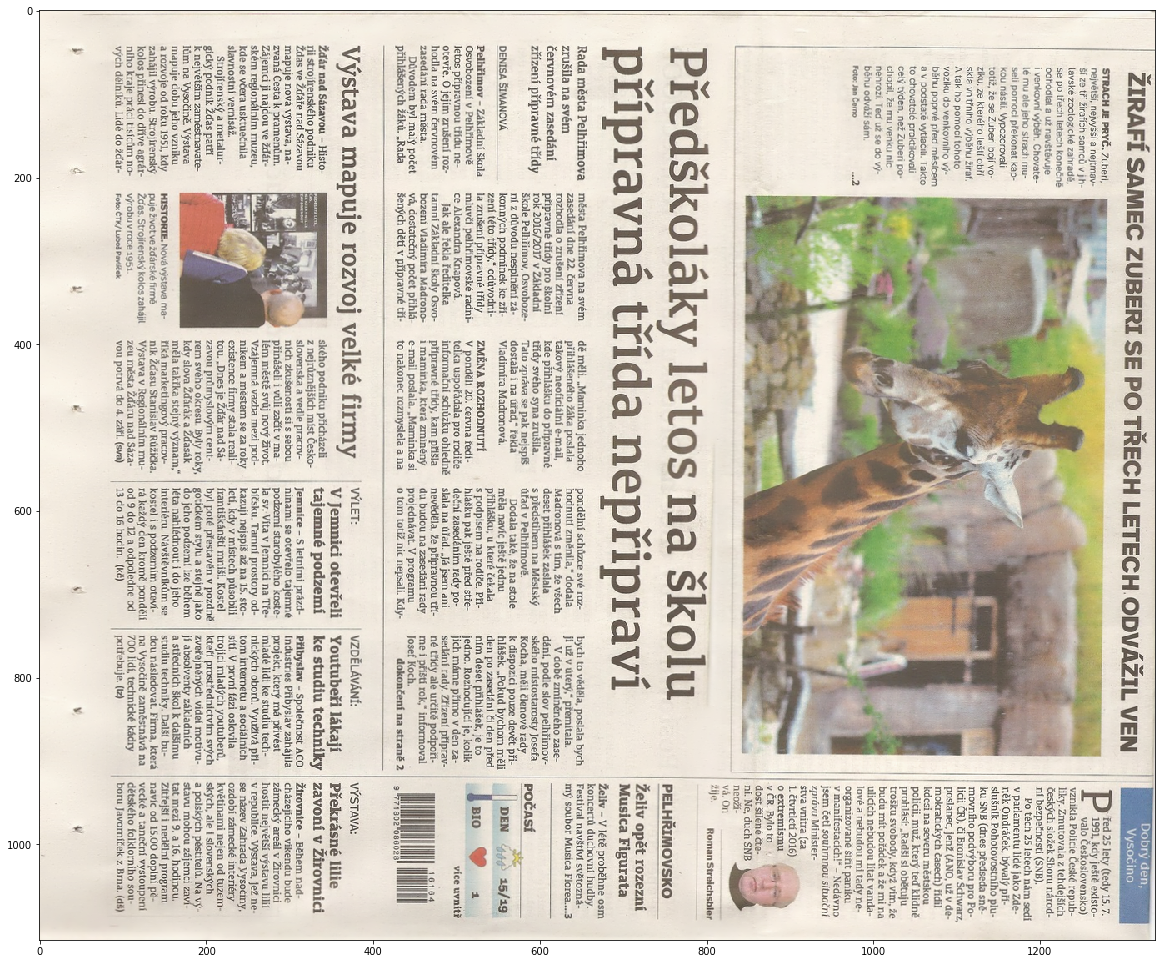

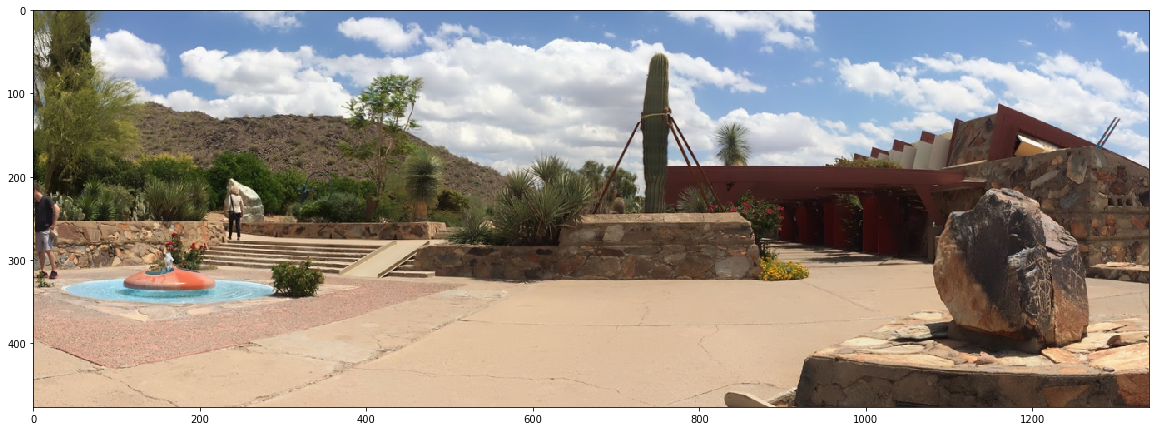

In [35]:
for var,name in zip(img_var, IMG_NAME):
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(stitching(var,name), cv2.COLOR_BGR2RGB))